## CHATBOT WITH LANGGRAPH

### Here is a phase one in this phase one define some common notation

##### Here is my model

In [1]:
'''from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")'''

from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [33]:
llm.invoke("hello")

AIMessage(content='Hello! 👋  How can I help you today? 😄\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.3e-07, 'queue_time': 0.02896731, 'total_time': 0.027273057}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-58a8ff27-959e-4bcb-bf19-69105f376c49-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})

In [4]:
llm.invoke("hello").content

'Hello! 👋  How can I help you today?\n'

##### This is all the import statement

In [5]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

##### Here is a my call model Function

https://github.com/langchain-ai/langgraph/tree/main/libs/langgraph/langgraph/graph

In [18]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

#### Here is my workflow

In [19]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

#### Here is my visualization

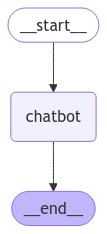

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

#### Here i am invoking the Graph

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [21]:
input={"messages":["hi, my name is sunny"]}

In [22]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is sunny', additional_kwargs={}, response_metadata={}, id='b73665f2-4083-4951-9fb4-ac6c5974025a'),
  AIMessage(content="Hello Sunny!  ☀️ \n\nIt's nice to meet you.  \n\nIs there anything I can help you with today? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 15, 'total_tokens': 48, 'completion_time': 0.06, 'prompt_time': 9.8049e-05, 'queue_time': 0.013573960000000001, 'total_time': 0.060098049}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-5cd5cba7-0ce5-4609-bcc4-de7cfde0dc3a-0', usage_metadata={'input_tokens': 15, 'output_tokens': 33, 'total_tokens': 48})]}

#### Here i am streaming the output

In [12]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hi Sunny!  \n\nIt's nice to meet you.  😊 \n\nIs there anything I can help you with today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 15, 'total_tokens': 45, 'completion_time': 0.054545455, 'prompt_time': 0.000774147, 'queue_time': -0.0007303359999999999, 'total_time': 0.055319602}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-13cd2eb2-cf1d-422e-8488-37afc8924bd4-0', usage_metadata={'input_tokens': 15, 'output_tokens': 30, 'total_tokens': 45})]}




## starting phase2 from here with tool

##### Lets first add the custom tool

In [23]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [24]:
search.invoke("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [25]:
search.invoke("what is a weather in india?")

"It's 90 degrees and sunny."

In [26]:
tools=[search]

In [27]:
tools

[StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001FF84367BE0>)]

In [28]:
tool_node=ToolNode(tools)

In [29]:
tool_node

tools(tags=None, recurse=True, func_accepts_config=True, func_accepts={'writer': False, 'store': False}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001FF84367BE0>)}, handle_tool_errors=True)

In [37]:
llm_with_tool=llm.bind_tools(tools)

In [38]:
llm_with_tool.invoke("hi")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_sb7r', 'function': {'arguments': '{"query":"hi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 937, 'total_tokens': 1015, 'completion_time': 0.141818182, 'prompt_time': 0.030009708, 'queue_time': 0.0030304090000000013, 'total_time': 0.17182789}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-72226c88-d776-449c-ab0d-e27851547bcb-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi'}, 'id': 'call_sb7r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 937, 'output_tokens': 78, 'total_tokens': 1015})

##### Here is a my call model binding with tool

In [57]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [58]:
response=call_model({"messages": ["hi how are you?"]})

In [59]:
response

{'messages': [AIMessage(content='I am doing well, thank you. How can I help you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 941, 'total_tokens': 957, 'completion_time': 0.029090909, 'prompt_time': 0.031196443, 'queue_time': 0.0032329660000000003, 'total_time': 0.060287352}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-1db8fb5d-a8fd-4f85-8091-c2662bc18c22-0', usage_metadata={'input_tokens': 941, 'output_tokens': 16, 'total_tokens': 957})]}

AIMessage(content='I am doing well, thank you. How can I help you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 941, 'total_tokens': 957, 'completion_time': 0.029090909, 'prompt_time': 0.031196443, 'queue_time': 0.0032329660000000003, 'total_time': 0.060287352}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-1db8fb5d-a8fd-4f85-8091-c2662bc18c22-0', usage_metadata={'input_tokens': 941, 'output_tokens': 16, 'total_tokens': 957})

##### Show the above output with the json viewer

In [61]:
messages = response['messages']

In [62]:
last_message=messages[-1]

In [63]:
last_message.tool_calls

[]

In [64]:
response=call_model({"messages": ["what is a weather in India?"]})

In [65]:
messages = response['messages']

In [66]:
last_message=messages[-1]

In [67]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'call_4ym3',
  'type': 'tool_call'}]

#### Here is my Router Function

In [74]:
def router_function(state: MessagesState) -> Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END

### lets design the workflow now

In [75]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

app = workflow.compile()

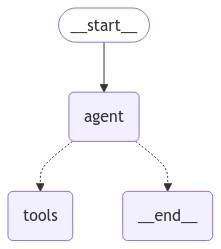

In [76]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [77]:
app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='7a1bb4f5-0fb7-492e-bf84-dc5f93ea0aab'),
  AIMessage(content='I am doing well, thank you. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 941, 'total_tokens': 958, 'completion_time': 0.030909091, 'prompt_time': 0.032782409, 'queue_time': 0.06127818, 'total_time': 0.0636915}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-3dee5020-8732-4680-87c9-92f043356ca6-0', usage_metadata={'input_tokens': 941, 'output_tokens': 17, 'total_tokens': 958})]}

In [78]:
app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='24e80b1d-ad6e-4448-9a09-74b8f4a54889'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2jts', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.0301207, 'queue_time': 0.0028375470000000028, 'total_time': 0.179211609}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-42988565-630c-4985-8bcf-c605307ac867-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_2jts', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='d40e8313-4be4-4f

In [79]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_79sq', 'function': {'arguments': '{"query":"weather in san francisco"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 942, 'total_tokens': 1023, 'completion_time': 0.147272727, 'prompt_time': 0.039154342, 'queue_time': 0.002524041999999997, 'total_time': 0.186427069}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ad7bcb38-1be0-497d-bf3b-8be2ba078400-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in san francisco'}, 'id': 'call_79sq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 81, 'total_tokens': 1023})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='300e63ae-da8d-40c9-9e11-bbc2aaabb657', tool_call_i

#### Lets create a loop now

In [80]:
workflow.add_edge("tools", 'agent')


Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [81]:
app = workflow.compile()

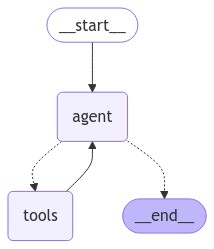

In [82]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [83]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6d2a', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.033224759, 'queue_time': 0.07441625099999999, 'total_time': 0.182315668}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-38261aea-1488-4255-ad95-c2a34f3733f9-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_6d2a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='a1558fcc-140f-45fd-8375-4b727171fdbd', tool_call_id='call_6d2a')]}


here

#### Strating Phase 3 from here with memory and checkpointing

In [84]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [85]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

app3 = workflow3.compile(checkpointer = memory)

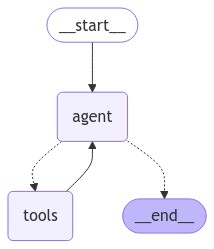

In [86]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [87]:
config = {"configurable": {"thread_id": "1"}}

In [91]:
events = app3.stream(
    {"messages": ["Hi there! My name is Sunny."]}, config, stream_mode="values"
)

In [92]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Sunny.
================================== Ai Message ==================================

Nice to meet you, Sunny! What can I do for you today?


In [93]:
events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [94]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
================================== Ai Message ==================================

Your name is Sunny.


In [95]:
config

{'configurable': {'thread_id': '1'}}

In [97]:
memory.get(config)

{'v': 1,
 'ts': '2024-10-28T12:47:51.236640+00:00',
 'id': '1ef952ad-7bc1-6146-800b-f04ab365d30a',
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='7889328e-cfbf-4b15-8176-58243ae5809f'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1vgr', 'function': {'arguments': '{"query":"My name is Sunny"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 944, 'total_tokens': 1027, 'completion_time': 0.150909091, 'prompt_time': 0.03833481, 'queue_time': 0.003830514, 'total_time': 0.189243901}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-863768b4-61cb-4147-98ba-c69916ec52c6-0', tool_calls=[{'name': 'search', 'args': {'query': 'My name is Sunny'}, 'id': 'call_1vgr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 944, 'output_tokens

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")